## loading libraries

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Input, Dense, LeakyReLU, BatchNormalization, ReLU
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.optimizers import Adam
from keras import initializers
from keras.utils import plot_model, np_utils
from keras import backend as keras

Using TensorFlow backend.


## define generator for model

In [ ]:
def generator_model():
  init = initializers.RandomNormal(stddev=0.02)
  generator = Sequential()
  generator.add(Dense(2*2*512, input_shape=(100,), kernel_initializer=init))
  generator.add(Reshape((2, 2, 512)))
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(0.2))
  generator.add(Conv2DTranspose(256, kernel_size=5, strides=2, padding='same'))
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(0.2))
  generator.add(Conv2DTranspose(128, kernel_size=5, strides=2, padding='same'))
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(0.2))
  generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding='same'))
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(0.2))
  generator.add(Conv2DTranspose(3, kernel_size=5, strides=2, padding='same',activation='tanh'))
  return generator


## define discriminator for model

In [ ]:
def discriminator_model(shape):
  init = initializers.RandomNormal(stddev=0.02)
  discriminator = Sequential()
  discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding='same',input_shape=(shape), kernel_initializer=init))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
  discriminator.add(BatchNormalization())
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Conv2D(256, kernel_size=5, strides=2, padding='same'))
  discriminator.add(BatchNormalization())
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Conv2D(512, kernel_size=5, strides=2, padding='same'))
  discriminator.add(BatchNormalization())
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Flatten())
  discriminator.add(Dense(1, activation='sigmoid'))
  return discriminator

## getting the data

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


## Reshaping and normalizing the inputs

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
input_shape = (32, 32, 3)

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, len(np.unique(y_train)))
Y_test = np_utils.to_categorical(y_test, len(np.unique(y_train)))

# the generator is using tanh activation, for which we need to preprocess 
# the image data into the range between -1 and 1.

X_train = np.float32(X_train)
X_train = (X_train / 255 - 0.5) * 2
X_train = np.clip(X_train, -1, 1)

X_test = np.float32(X_test)
X_test = (X_train / 255 - 0.5) * 2
X_test = np.clip(X_test, -1, 1)

## Generator model visualization

In [ ]:
generator = generator_model()
discriminator = discriminator_model(X_train[0].shape)
generator.summary()
discriminator.compile(Adam(lr=0.0003, beta_1=0.5), loss='binary_crossentropy',metrics=['binary_accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              206848    
_________________________________________________________________
reshape_1 (Reshape)          (None, 2, 2, 512)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 512)         2048      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 2, 2, 512)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 4, 4, 256)         3277056   
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 4, 4, 256)        

## Discriminator model visualization

In [ ]:
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         819456    
_________________________________________________________________
batch_normalization_6 (Batch (None, 4, 4, 256)        

## compile model

In [ ]:
discriminator.trainable = False
z = Input(shape=(100,))
generated_image = generator(z)
label = discriminator(generated_image)
GAN = Model(inputs=z, outputs=label)
GAN.compile(Adam(lr=0.0004, beta_1=0.5), loss='binary_crossentropy',metrics=['binary_accuracy'])



## fit model

epoch = 1/60, d_loss=0.479, g_loss=2.511                                                                                                     


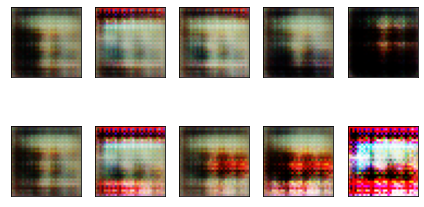

epoch = 2/60, d_loss=0.531, g_loss=0.735                                                                                                     
epoch = 3/60, d_loss=0.175, g_loss=0.136                                                                                                     
epoch = 4/60, d_loss=0.308, g_loss=3.745                                                                                                     
epoch = 5/60, d_loss=0.487, g_loss=4.934                                                                                                     
epoch = 6/60, d_loss=0.425, g_loss=1.694                                                                                                     
epoch = 7/60, d_loss=0.324, g_loss=4.234                                                                                                     
epoch = 8/60, d_loss=0.269, g_loss=3.130                                                                                                     
epoch 

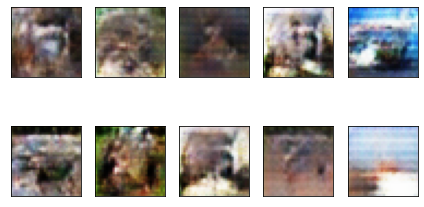

epoch = 12/60, d_loss=0.301, g_loss=2.179                                                                                                     
epoch = 13/60, d_loss=0.244, g_loss=2.324                                                                                                     
epoch = 14/60, d_loss=0.222, g_loss=5.348                                                                                                     
epoch = 15/60, d_loss=0.342, g_loss=4.401                                                                                                     
epoch = 16/60, d_loss=0.254, g_loss=4.031                                                                                                     
epoch = 17/60, d_loss=0.192, g_loss=4.252                                                                                                     
epoch = 18/60, d_loss=0.426, g_loss=2.984                                                                                                     

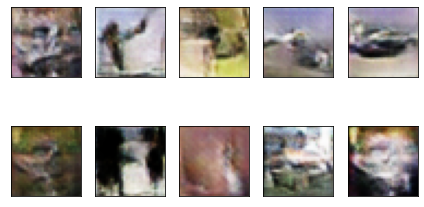

epoch = 22/60, d_loss=0.202, g_loss=6.952                                                                                                     
epoch = 23/60, d_loss=0.664, g_loss=3.689                                                                                                     
epoch = 24/60, d_loss=0.212, g_loss=5.084                                                                                                     
epoch = 25/60, d_loss=0.255, g_loss=4.346                                                                                                     
epoch = 26/60, d_loss=0.211, g_loss=6.368                                                                                                     
epoch = 27/60, d_loss=0.185, g_loss=6.745                                                                                                     
epoch = 28/60, d_loss=0.243, g_loss=3.829                                                                                                     

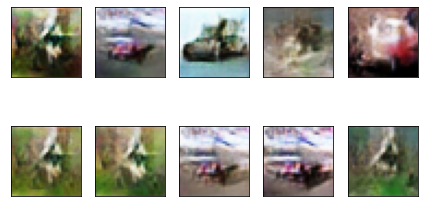

epoch = 32/60, d_loss=0.238, g_loss=5.542                                                                                                     
epoch = 33/60, d_loss=0.225, g_loss=4.583                                                                                                     
epoch = 34/60, d_loss=0.278, g_loss=4.531                                                                                                     
epoch = 35/60, d_loss=0.542, g_loss=10.484                                                                                                     
epoch = 36/60, d_loss=0.181, g_loss=8.267                                                                                                     
epoch = 37/60, d_loss=0.214, g_loss=8.181                                                                                                     
epoch = 38/60, d_loss=0.176, g_loss=6.461                                                                                                    

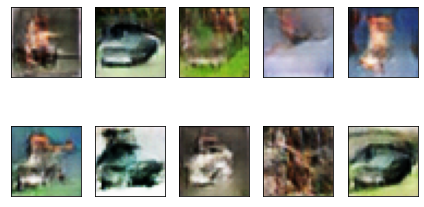

epoch = 42/60, d_loss=0.170, g_loss=7.332                                                                                                     
epoch = 43/60, d_loss=0.186, g_loss=7.191                                                                                                     
epoch = 44/60, d_loss=0.449, g_loss=4.307                                                                                                     
epoch = 45/60, d_loss=0.279, g_loss=3.913                                                                                                     
epoch = 46/60, d_loss=0.179, g_loss=5.327                                                                                                     
epoch = 47/60, d_loss=0.234, g_loss=4.230                                                                                                     
epoch = 48/60, d_loss=0.175, g_loss=6.263                                                                                                     

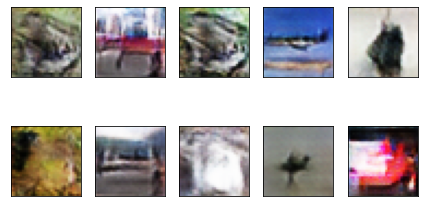

epoch = 52/60, d_loss=0.178, g_loss=6.749                                                                                                     
epoch = 53/60, d_loss=0.181, g_loss=8.709                                                                                                     
epoch = 54/60, d_loss=0.182, g_loss=7.228                                                                                                     
epoch = 55/60, d_loss=0.198, g_loss=4.064                                                                                                     
epoch = 56/60, d_loss=0.276, g_loss=3.424                                                                                                     
epoch = 57/60, d_loss=0.195, g_loss=5.986                                                                                                     
epoch = 58/60, d_loss=0.334, g_loss=7.698                                                                                                     

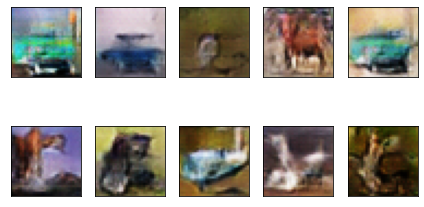

In [ ]:
epochs = 60
batch_size = 32
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):
        
        # Train Discriminator weights
        discriminator.trainable = True
        
        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real * (1 - smooth))
        
        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, 100))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)
         
        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights
        discriminator.trainable = False
        g_loss_batch = GAN.train_on_batch(x=z, y=real)

        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, g_loss_batch[0]),
            100*' ',
            end='\r'
        )
    
    d_loss.append(d_loss_batch)
    g_loss.append(g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], g_loss[-1]), 100*' ')

    if e % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k + 1, xticks=[], yticks=[])
            plt.imshow(((x_fake[k] + 1)* 127).astype(np.uint8))

        plt.tight_layout()
        plt.show()

## evaluate model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'up right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


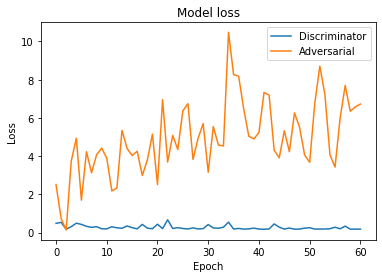

In [ ]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='up right')
plt.show()

